In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from support_code.model import DQN
from support_code.env import TradingEnv
from support_code.functions import fetch_data, buy_and_hold, pickle_model, corr

In [2]:
def augment_state(state):
    
    open_slope = (state[0,0] - state[-2,0]) / 4
    high_slope = (state[0,1] - state[-2,1]) / 4
    low_slope = (state[0,2] - state[-2,2]) / 4
    close_slope = (state[0,3] - state[-2,3]) / 4
    vol_slope = (state[0,4] - state[-2,4]) / 4
    
    
    return np.array([
        state[0], state[1], state[2], state[3], state[4],
        [open_slope, high_slope, low_slope, close_slope, vol_slope],
        state[5]]).reshape(7,5)

In [3]:
df = fetch_data('goog_df')

In [4]:
np.random.seed(None)

starting_balance = 1_000_000

env = TradingEnv(df, starting_balance, training=True)
env.verbose = 0
env.seed(None)

In [5]:
shape_a = env.action_space.n
shape_o = augment_state(env.reset()).shape

In [6]:
dqn_solver = DQN(
    action_space=shape_a,
    state_space=shape_o,
    batch_size=64,
    memory_size=1_000_000,
    gamma=0.99,
    alpha=0.99,
    alpha_decay=0.99,
    alpha_min=0.01,
    )

In [7]:
env.verbose = 0
dqn_solver.verbose = 0
history = []

In [11]:
for i in np.arange(0, 100):
    
    # Reset the evironment at the top of each episode
    state = env.reset()
    state = augment_state(state)
    
    stock_performance = []
    model_performance = []
    reward_trace = []    
    actions = []
    
    start = env.current_step
    done = False    
    
    # The model will iterate until a terminal state is reached
    while not done:
                
        # Select an action by passing the current observation/state to the DQN
        action = dqn_solver.act(state)
        
        # The environment takes a step according to that action and returns the new state, the reward, and the terminal status
        next_state, reward, done, info = env.step(action)
        next_state = augment_state(next_state)
                
        # Commit to the DQN's memory the relevant information
        dqn_solver.remember(state, action, reward, next_state, done)
        
        # Update the current state
        state = next_state

        actions.append(action)
        reward_trace.append(reward)
        model_performance.append(env.net_worth)  
        stock_performance.append(df.loc[env.current_step]['close'])
            
    print('================================================================================================================')
    print(i+1)
    print('FINAL PROFIT', env.net_worth-env.balance_init)
    print('TOTAL REWARD:', sum(reward_trace))
    print('DAY RANGE:', start, env.current_step)
    print('EXPLORATION:', dqn_solver.alpha)
    print('MEMORY SIZE:', len(dqn_solver.memory))
    print('================================================================================================================')
    
    # After each episode, perform experience replay
    test = dqn_solver.replay()  
    
    print('\n\n\n')
    
    history.append({
        'stock': stock_performance,
        'model': model_performance,
        'actions': actions,
        'rewards': sum(reward_trace),
        })

X, y = test

1
FINAL PROFIT 647002.8303161382
TOTAL REWARD: -3.3277135576657253
DAY RANGE: 52 217
EXPLORATION: 0.07479631572685264
MEMORY SIZE: 32360




2
FINAL PROFIT 944708.390469233
TOTAL REWARD: -8.918081612696227
DAY RANGE: 886 1280
EXPLORATION: 0.07404835256958411
MEMORY SIZE: 32754




3
FINAL PROFIT 56588.615105577745
TOTAL REWARD: -0.5642213828995152
DAY RANGE: 1829 1960
EXPLORATION: 0.07330786904388827
MEMORY SIZE: 32885




4
FINAL PROFIT 80265.50469175633
TOTAL REWARD: 0.17577944363681286
DAY RANGE: 435 452
EXPLORATION: 0.07257479035344938
MEMORY SIZE: 32902




5
FINAL PROFIT 20661.293920568423
TOTAL REWARD: 0.023934165883598035
DAY RANGE: 716 718
EXPLORATION: 0.07184904244991488
MEMORY SIZE: 32904




6
FINAL PROFIT 19204.390988625237
TOTAL REWARD: 0.008719690209330758
DAY RANGE: 80 82
EXPLORATION: 0.07113055202541574
MEMORY SIZE: 32906




7
FINAL PROFIT -60406.87403193419
TOTAL REWARD: -3.153735035047802
DAY RANGE: 2287 2357
EXPLORATION: 0.07041924650516158
MEMORY SIZE: 32976




8





24
FINAL PROFIT -95771.76015313342
TOTAL REWARD: -6.601546063675475
DAY RANGE: 1307 1586
EXPLORATION: 0.05935942452475082
MEMORY SIZE: 35830




25
FINAL PROFIT 757850.2399397907
TOTAL REWARD: -12.518881389358105
DAY RANGE: 876 1212
EXPLORATION: 0.058765830279503314
MEMORY SIZE: 36166




26
FINAL PROFIT -31086.24053425074
TOTAL REWARD: -0.17999582298607644
DAY RANGE: 1479 1494
EXPLORATION: 0.05817817197670828
MEMORY SIZE: 36181




27
FINAL PROFIT 44789.662273483584
TOTAL REWARD: -8.664474886660622
DAY RANGE: 1219 1413
EXPLORATION: 0.057596390256941195
MEMORY SIZE: 36375




28
FINAL PROFIT -999.0009990008548
TOTAL REWARD: 0.0
DAY RANGE: 822 823
EXPLORATION: 0.05702042635437178
MEMORY SIZE: 36376




29
FINAL PROFIT 423896.2240318274
TOTAL REWARD: 6.38807396705468
DAY RANGE: 1859 2248
EXPLORATION: 0.05645022209082806
MEMORY SIZE: 36765




30
FINAL PROFIT 107048.19738411531
TOTAL REWARD: -6.7222007269834645
DAY RANGE: 770 985
EXPLORATION: 0.05588571986991978
MEMORY SIZE: 36980









47
FINAL PROFIT 136353.41661170707
TOTAL REWARD: 0.4307852284811533
DAY RANGE: 1666 1753
EXPLORATION: 0.04710848717170975
MEMORY SIZE: 38884




48
FINAL PROFIT 307778.4635155238
TOTAL REWARD: -34.325143166790056
DAY RANGE: 101 753
EXPLORATION: 0.04663740229999265
MEMORY SIZE: 39536




49
FINAL PROFIT -999.0009990008548
TOTAL REWARD: 0.0
DAY RANGE: 970 971
EXPLORATION: 0.04617102827699272
MEMORY SIZE: 39537




50
FINAL PROFIT 1035955.7359074256
TOTAL REWARD: 1.5985151915963234
DAY RANGE: 875 1387
EXPLORATION: 0.045709317994222794
MEMORY SIZE: 40049




51
FINAL PROFIT 18272.942126438604
TOTAL REWARD: -0.7015177762220027
DAY RANGE: 1718 1834
EXPLORATION: 0.04525222481428057
MEMORY SIZE: 40165




52
FINAL PROFIT 297103.85279031633
TOTAL REWARD: 0.13600650988890595
DAY RANGE: 27 155
EXPLORATION: 0.04479970256613776
MEMORY SIZE: 40293




53
FINAL PROFIT 11705.956128081307
TOTAL REWARD: -0.17474260687829343
DAY RANGE: 235 502
EXPLORATION: 0.04435170554047638
MEMORY SIZE: 40560




5





70
FINAL PROFIT -999.0009990008548
TOTAL REWARD: 0.0
DAY RANGE: 1952 1953
EXPLORATION: 0.03738596830031274
MEMORY SIZE: 45148




71
FINAL PROFIT 757381.4695106414
TOTAL REWARD: -6.423603458661882
DAY RANGE: 993 1686
EXPLORATION: 0.03701210861730961
MEMORY SIZE: 45841




72
FINAL PROFIT -60871.99092915887
TOTAL REWARD: 7.444511547161478
DAY RANGE: 1283 1492
EXPLORATION: 0.03664198753113651
MEMORY SIZE: 46050




73
FINAL PROFIT -28006.05896461988
TOTAL REWARD: -0.03368630249159748
DAY RANGE: 1161 1165
EXPLORATION: 0.036275567655825146
MEMORY SIZE: 46054




74
FINAL PROFIT 349465.8906879325
TOTAL REWARD: 1.1631011856751226
DAY RANGE: 1861 2212
EXPLORATION: 0.03591281197926689
MEMORY SIZE: 46405




75
FINAL PROFIT 156158.26218917966
TOTAL REWARD: 0.346068996141723
DAY RANGE: 1041 1142
EXPLORATION: 0.035553683859474224
MEMORY SIZE: 46506




76
FINAL PROFIT 199669.73667994305
TOTAL REWARD: 4.46000945497151
DAY RANGE: 928 1069
EXPLORATION: 0.03519814702087948
MEMORY SIZE: 46647










93
FINAL PROFIT 289504.02151935454
TOTAL REWARD: 6.696974223258587
DAY RANGE: 1860 2169
EXPLORATION: 0.029670038450977095
MEMORY SIZE: 51458




94
FINAL PROFIT 65939.45065314858
TOTAL REWARD: 0.014799679333258778
DAY RANGE: 1374 1401
EXPLORATION: 0.029373338066467324
MEMORY SIZE: 51485




95
FINAL PROFIT 186111.9197870728
TOTAL REWARD: 0.7790749248391647
DAY RANGE: 2095 2357
EXPLORATION: 0.02907960468580265
MEMORY SIZE: 51747




96
FINAL PROFIT 4711073.937474126
TOTAL REWARD: -873.3711782957026
DAY RANGE: 52 2357
EXPLORATION: 0.028788808638944622
MEMORY SIZE: 54052




97
FINAL PROFIT 2039161.9425743152
TOTAL REWARD: -57.41408246922317
DAY RANGE: 674 2075
EXPLORATION: 0.028500920552555174
MEMORY SIZE: 55453




98
FINAL PROFIT 85406.0998408487
TOTAL REWARD: 4.480613680269028
DAY RANGE: 2221 2357
EXPLORATION: 0.028215911347029624
MEMORY SIZE: 55589




99
FINAL PROFIT 1239061.2232031883
TOTAL REWARD: -129.86791618319117
DAY RANGE: 1206 2357
EXPLORATION: 0.027933752233559327
MEMOR

In [19]:
i = -2

In [20]:
long = buy_and_hold(
    balance_init=env.balance_init,
    back_prices=history[i]['stock'],
    fee=env.fee
    )

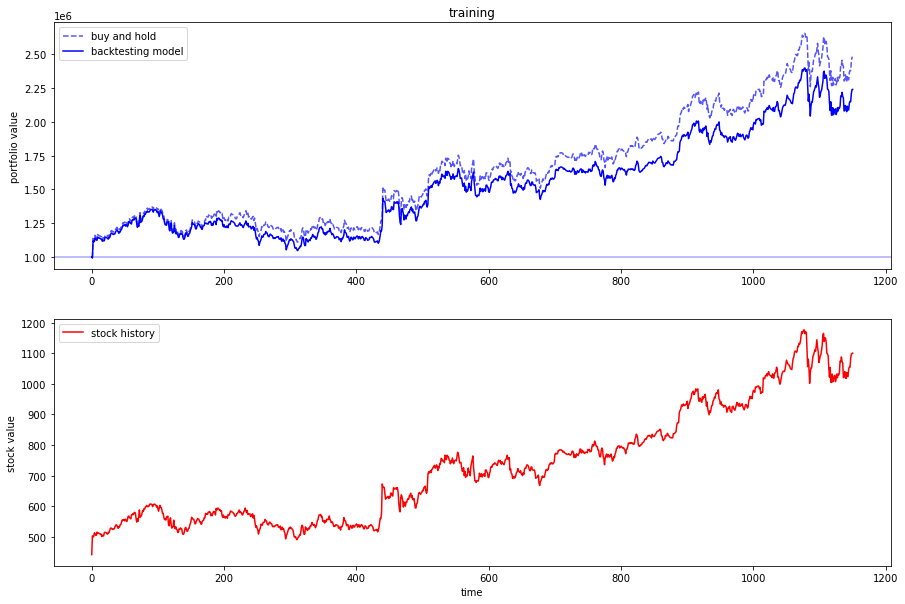

In [21]:
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.plot(long, 'b--', alpha=0.667, label='buy and hold')
ax1.plot(history[i]['model'], 'b-', label='backtesting model')
ax1.axhline(env.balance_init, alpha=0.333, color='blue')
ax1.set_ylabel('portfolio value')
ax1.set_title('training')
ax1.legend()

ax2.plot(history[i]['stock'], 'r-', label='stock history')
ax2.set_ylabel('stock value')
ax2.set_xlabel('time')
ax2.legend()

plt.show();

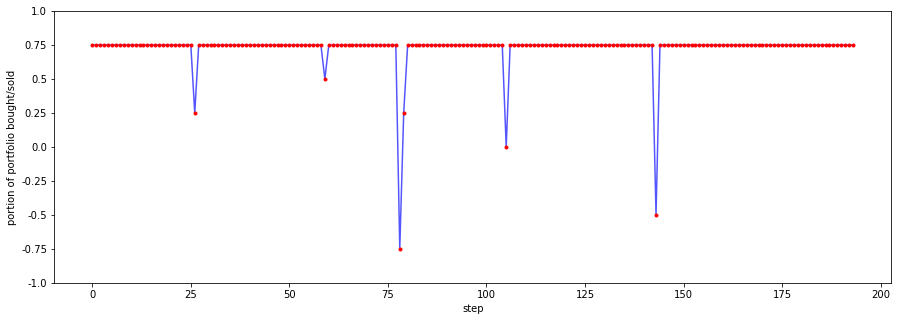

In [15]:
plt.figure(figsize=(15,5))
plt.plot(history[i]['actions'], 'b-', alpha=0.6667)
plt.plot(history[i]['actions'], 'r.')

plt.yticks(np.arange(dqn_solver.action_space), np.linspace(-1,1, dqn_solver.action_space))
plt.xlabel('step')
plt.ylabel('portion of portfolio bought/sold')
plt.show();

In [16]:
rewards = np.array([history[i]['rewards'] for i in np.arange(len(history))])

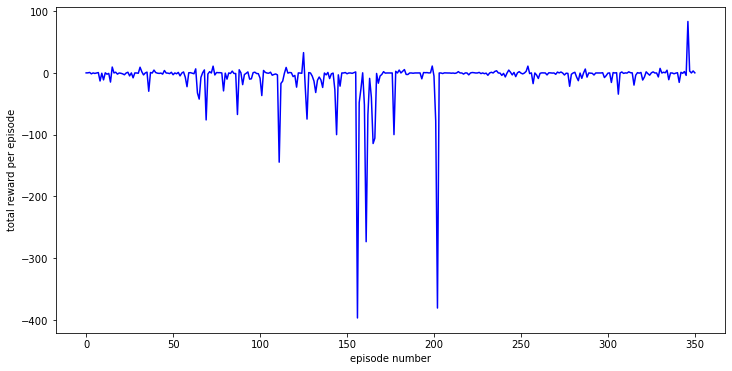

In [17]:
plt.figure(figsize=(12,6))
plt.plot(rewards[:-8], 'b-')
plt.xlabel('episode number')
plt.ylabel('total reward per episode')
plt.show();

In [18]:
print(corr(history[i]['stock'], history[i]['actions']))

0.04864853733474039
